# Supervised classification

In the data.csv there are letters (uppercases and lowercases) and numbers, 28x28 pixels in a row format.

* First, you need to know which labels are which, meaning you need to visualize some data to realize which number labels represents a letter, or a number.

In [22]:
# Import libraries

import time                                                
inicio=time.time()                                          
print ('Comenzando...\n')
print ('Modelo SoftMax (MLR) : Numeros')    
import pandas as pd                                         
import numpy as np                                          

import matplotlib.pyplot as plt                             
import seaborn as sns                                       
%matplotlib inline

from sklearn.metrics import confusion_matrix               
from scipy.optimize import minimize                         

from sklearn.datasets import make_circles, load_boston      
from sklearn.model_selection import train_test_split as tts

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

import warnings                                             # avisos
warnings.filterwarnings('ignore', category=RuntimeWarning)  # elimino un warning por valores NaN en logaritmos o /0


Comenzando...

Modelo SoftMax (MLR) : Numeros


In [23]:
datos = pd.read_csv("data_all.csv", encoding='ISO-8859-1')     
print ('Datos leidos...')
display(datos.head())
matriz_datos=datos.values   
print ('Dimensiones matriz de datos: {}'.format(matriz_datos.shape))

Datos leidos...


,e,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,33.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Dimensiones matriz de datos: (116322, 785)


In [24]:
datos.nunique()

e      62
1       1
2       1
3       1
4       1
       ..
780     1
781     1
782     1
783     1
784     1
Length: 785, dtype: int64

In [25]:
datos.e.unique()

array([36.,  0.,  3., 33., 30., 24., 40.,  5.,  8.,  2.,  4., 47.,  7.,
       32., 60., 18., 46., 59., 12., 37., 53., 15.,  1.,  9., 38., 43.,
       44., 19., 55.,  6., 58., 41., 20., 29., 28., 31., 42., 39., 25.,
       49., 35., 14., 57., 34., 26., 61., 11., 13., 27., 51., 23., 10.,
       22., 56., 48., 52., 16., 17., 54., 21., 50., 45.])

In [26]:
datos.loc[datos.e == 35]

,e,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
105,35.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
391,35.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
436,35.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536,35.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
593,35.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114946,35.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
114998,35.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
115579,35.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
115717,35.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


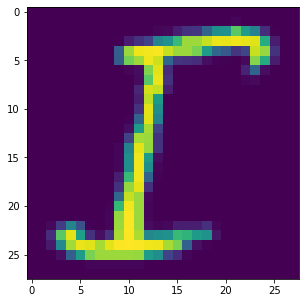

In [28]:
plt.figure(figsize=(5,5))
plt.imshow(matriz_datos[300,1:].reshape(28,28))  
plt.show()

In [42]:
number= datos[(datos['e'] <10)]
uppercases= datos[(datos['e'] >= 10) & (datos['e'] <= 35)]
lowercases= datos[(datos['e'] >= 36) & (datos['e'] <= 62)]

* Now, try to train a classifier model to predict the uppercases. Use every single model you know for classification.

In [30]:
# Your code here
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris

In [33]:
X=uppercases.drop(columns=['e'])._get_numeric_data()
y=uppercases.e

In [34]:
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, train_size=0.8, random_state=42)

In [35]:
logisticRegr = LogisticRegression()

In [36]:
logisticRegr.fit(X_train, y_train)

/home/bribas/anaconda3/envs/clase/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [37]:
predictions = logisticRegr.predict(X_test)

In [38]:
score = logisticRegr.score(X_test, y_test)

In [39]:
score

0.8186313606635827

* Try to do the same thing with lowercases.

In [43]:
# Your code here
X_m=lowercases.drop(columns=['e'])._get_numeric_data()
y_m=lowercases.e

In [44]:
X_train_m, X_test_m, y_train_m, y_test_m = tts(X_m, y_m, test_size=0.2, train_size=0.8, random_state=42)

In [45]:
logisticRegr.fit(X_train_m, y_train_m)

/home/bribas/anaconda3/envs/clase/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [46]:
score = logisticRegr.score(X_test_m, y_test_m)

In [47]:
score

0.7880635624538064

* Try to do the same thing with numbers.

In [48]:
# Your code here
X_n=number.drop(columns=['e'])._get_numeric_data()
y_n=number.e

In [49]:
X_train_n, X_test_n, y_train_n, y_test_n = tts(X_n, y_n, test_size=0.2, train_size=0.8, random_state=42)

In [50]:
logisticRegr.fit(X_train_n, y_train_n)

/home/bribas/anaconda3/envs/clase/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [51]:
score = logisticRegr.score(X_test_n, y_test_n)

In [52]:
score

0.930939226519337